In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import sklearn
from sklearn import preprocessing
import pandas as pd

import os
from os import path

In [2]:
df = pd.read_pickle('dataframe.pkl')
df.sample(1)

,label,image,intensity_image,convex_area,convex_image,bbox-0,bbox-1,bbox-2,bbox-3,bbox-4,...,hc_foci_ratio_d2b_volume_mean,hc_foci_ratio_d2b_volume_variance,hc_foci_d_nearest_neighbor_mean,hc_foci_d_nearest_neighbor_variance,hc_foci_ratio_nearest_neighbor_volume_mean,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,hc_foci_ratio_nearest_neighbor(verts)_mean_count,hc_foci_ratio_nearest_neighbor(verts)_variance_count
full_label,,,,,,,,,,,,,,,,,,,,,
JC_Plate1_BSA_good_17_nucleus_5,5,"[[[False, False, False, False, False, False, F...","[[[[0. 0. 0.], [0. 0. 0.], [0. 0. 0.], [0. 0. ...",355.0,"[[[False, False, False, False, False, False, F...",9,421,340,11,437,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
std_lower = np.std(df[df.area < np.percentile(df.area, 50)].area)
std_upper = np.std(df[df.area > np.percentile(df.area, 50)].area)

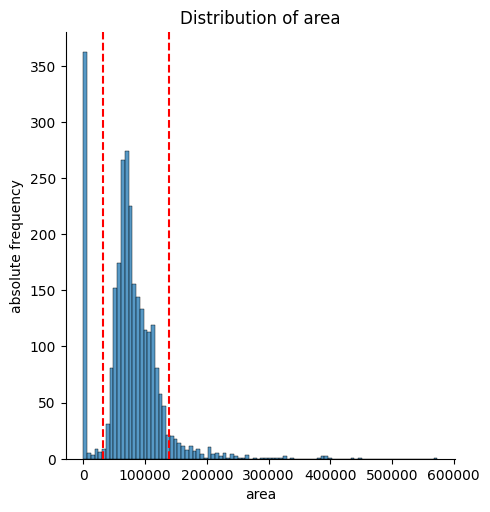

In [4]:
sns.displot(df.area)
plt.axvline(x=np.median(df.area) +  1.5*std_upper, color='r', linestyle='--')
plt.axvline(x=np.median(df.area) -  1.5*std_lower, color='r', linestyle='--')


plt.title('Distribution of area')
plt.xlabel('area')
plt.ylabel('absolute frequency')
plt.show()

In [5]:
df = df[(df.area >= (np.median(df.area) - 1.5 * std_lower)) & (df.area <= (np.median(df.area) +  1.5*std_upper))]

Text(5.069444444444445, 0.5, 'absolute frequency')

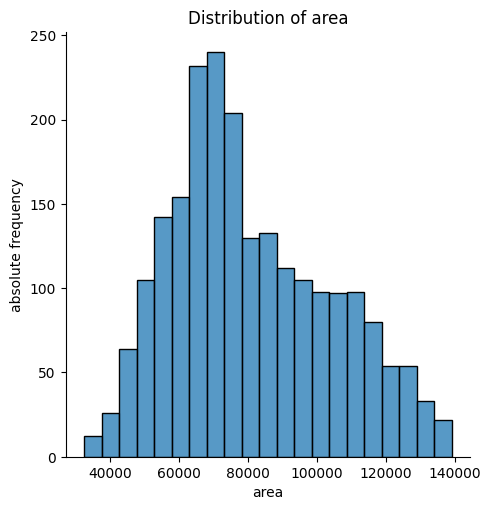

In [6]:
sns.displot(df.area)

plt.title('Distribution of area')
plt.xlabel('area')
plt.ylabel('absolute frequency')


Text(5.069444444444445, 0.5, 'absolute frequency')

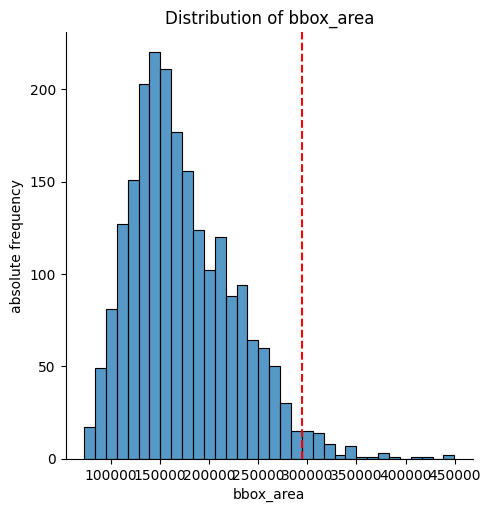

In [7]:
sns.displot(df.bbox_area)
plt.axvline(x=np.percentile(df.bbox_area, 97.5), color='r', linestyle='--')

plt.title('Distribution of bbox_area')
plt.xlabel('bbox_area')
plt.ylabel('absolute frequency')


In [8]:
df = df[df.bbox_area <= np.percentile(df.bbox_area, 97.5)]


Text(5.069444444444445, 0.5, 'absolute frequency')

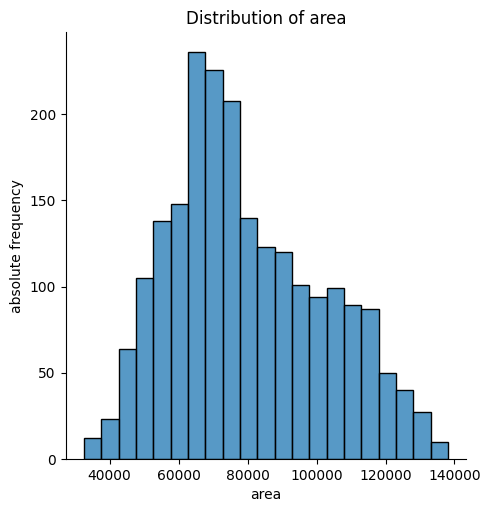

In [9]:
sns.displot(df.area)

plt.title('Distribution of area')
plt.xlabel('area')
plt.ylabel('absolute frequency')


In [10]:
image_features = ['image', 'slice', 'intensity_image', 'convex_image']
df_images = df[image_features]
df = df.drop(columns=image_features)
df_images.to_pickle('dataframe_images.pkl')
df.to_pickle('dataframe_no_images.pkl')

In [11]:
df = pd.read_pickle('dataframe_no_images.pkl')

In [12]:
columns = df.columns
df[columns] = df[columns].apply(pd.to_numeric, errors='ignore')

In [13]:
columns = df.columns
df[columns] = df[columns].applymap(lambda x: x[0] if isinstance(x, np.ndarray) and len(x) > 0 else x)
#some entries are of dtype np.ndarray but only contain one value - extracting this value

In [14]:
cols = [col for col in df.columns if ('bbox' not in col and 'centroid' not in col and 'coords' not in col and 'label' not in col) or ('local' in col)]
df = df[cols]
#drop features with no biological relevance

In [15]:
df = df[~df.isin([np.inf, -np.inf]).any(axis=1)]
df
#remove nuclei with inf values (only 6 so just remove)

,convex_area,area,equivalent_diameter,euler_number,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-0,inertia_tensor-1-1,...,hc_foci_ratio_d2b_volume_mean,hc_foci_ratio_d2b_volume_variance,hc_foci_d_nearest_neighbor_mean,hc_foci_d_nearest_neighbor_variance,hc_foci_ratio_nearest_neighbor_volume_mean,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,hc_foci_ratio_nearest_neighbor(verts)_mean_count,hc_foci_ratio_nearest_neighbor(verts)_variance_count
full_label,,,,,,,,,,,,,,,,,,,,,
JC_Plate1_MCP_low_84_nucleus_1,115201.0,103399.0,58.233457,1,0.503710,1364.089574,-10.111430,-3.110492,-10.111430,712.285776,...,3.199523,168.516848,1.081908,0.452115,15.694876,125.800659,0.538486,0.404874,0.022437,0.016870
JC_Plate1_MCP_low_84_nucleus_2,122276.0,106361.0,58.784288,1,0.430890,1409.391607,-24.866280,27.188925,-24.866280,741.698659,...,18.153920,1606.502953,1.044401,0.378608,10.797420,52.993859,0.610473,0.129923,0.019693,0.004191
JC_Plate1_MCP_low_86_nucleus_1,71269.0,58663.0,48.208307,1,0.381176,902.913520,-11.978228,-18.600885,-11.978228,394.779505,...,0.000000,0.000000,1.508637,0.725326,144.068223,5969.072853,1.138465,0.150092,0.189744,0.025015
JC_Plate1_MCP_low_86_nucleus_2,93234.0,83594.0,54.249053,1,0.484300,1052.573013,-10.854424,0.406077,-10.854424,680.017082,...,3.491586,113.830398,1.102422,0.356128,10.188218,52.348457,0.441729,0.197067,0.016360,0.007299
JC_Plate1_MCP_low_86_nucleus_3,78142.0,70280.0,51.200914,1,0.492157,947.395371,1.854463,0.927301,1.854463,495.471165,...,1.987629,18.506573,1.229475,0.419496,6.634556,16.620088,0.850126,0.383391,0.031486,0.014200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JC_Plate1_tnfa_high_79_nucleus_4,105422.0,94234.0,56.459410,1,0.453222,1247.664172,-5.503183,10.335385,-5.503183,633.455605,...,9.849296,604.154818,1.096647,0.275908,4.862923,8.219822,0.617960,0.411614,0.016262,0.010832
JC_Plate1_tnfa_high_87_nucleus_1,69117.0,62790.0,49.313287,1,0.494565,830.679971,9.709783,10.589417,9.709783,410.868019,...,4.844681,140.825577,2.354735,0.904568,88.946217,3507.268569,1.001655,0.931487,0.143094,0.133070
JC_Plate1_tnfa_high_87_nucleus_2,72907.0,65874.0,50.107777,1,0.562161,1027.070107,-0.880591,-2.483501,-0.880591,584.328339,...,0.000000,0.000000,1.417718,0.282213,15.567637,114.262786,0.673705,0.404519,0.037428,0.022473


In [16]:
df['condition'] = df.apply(lambda row : '_'.join(row.name.rsplit('_')[2:-3]), axis = 1)

/tmp/ipykernel_1153971/2434300690.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['condition'] = df.apply(lambda row : '_'.join(row.name.rsplit('_')[2:-3]), axis = 1)


In [17]:
from sklearn.impute import KNNImputer


#Drop fully empty features
df = df.dropna(axis=1, how='all')

condition = df['condition'].reset_index(drop=False)
features = df.drop(columns=['condition']).reset_index(drop=True)

imputer = KNNImputer(n_neighbors=5, keep_empty_features=True)
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

df_imputed = pd.concat([features_imputed, condition], axis=1, ignore_index=False)

print(features_imputed.shape, condition.shape)

(2138, 974) (2138, 2)


In [18]:
df_imputed.columns[df_imputed.isna().any()]

Index([], dtype='object')

In [19]:
df_imputed.sample(1)

,convex_area,area,equivalent_diameter,euler_number,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-0,inertia_tensor-1-1,...,hc_foci_d_nearest_neighbor_mean,hc_foci_d_nearest_neighbor_variance,hc_foci_ratio_nearest_neighbor_volume_mean,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,hc_foci_ratio_nearest_neighbor(verts)_mean_count,hc_foci_ratio_nearest_neighbor(verts)_variance_count,full_label,condition
1431,67616.0,60276.0,48.646164,1.0,0.48283,904.495085,6.797169,-9.528626,6.797169,479.612572,...,1.834785,0.554277,19.22628,224.679995,1.016577,0.418493,0.084715,0.034874,JC_Plate1_TNFa_low_51_nucleus_5,TNFa_low


In [20]:
#https://www.kaggle.com/code/oldwine357/removing-highly-correlated-features/notebook

def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return (x,drops)

In [21]:
condition = df_imputed['full_label'].reset_index(drop=True)
features = df_imputed.drop(columns=['condition','full_label']).reset_index(drop=True)

In [22]:
df_dropped, drops = remove_collinear_features(features,0.80)

Removed Columns {'local_centroid-2', 'weighted_moments-1-2-1-1', 'int_median_lamin', 'skewness_lamin', 'moments_central-1-0-3', 'weighted_moments_normalized-0-1-2-1', 'moments_normalized-0-1-3', 'weighted_moments-3-1-2-2', 'weighted_moments_normalized-0-2-0-0', 'weighted_moments_normalized-1-3-0-2', 'weighted_moments-0-2-0-2', 'asm_20_lamin', 'weighted_moments-2-3-2-0', 'weighted_moments_normalized-0-1-2-0', 'weighted_moments-2-2-0-0', 'weighted_moments_normalized-0-3-0-2', 'weighted_moments_normalized-1-0-2-1', 'weighted_moments_central-0-0-2-0', 'weighted_moments_central-1-2-0-2', 'weighted_moments_central-3-1-1-0', 'major_axis_length', 'weighted_moments_central-2-3-1-1', 'weighted_moments_normalized-0-3-2-1', 'weighted_moments_central-2-3-3-0', 'weighted_moments-1-3-2-1', 'weighted_moments_normalized-2-0-1-2', 'weighted_moments_central-2-0-0-0', 'weighted_local_centroid-1-2', 'weighted_moments_central-1-3-2-1', 'weighted_moments_central-2-1-0-0', 'inertia_tensor_eigvals-1', 'rd_dapi

In [23]:
df_dropped = pd.concat([df_dropped, condition], axis=1)

In [24]:
df_dropped['condition'] = df_dropped.apply(lambda row : '_'.join(row.full_label.rsplit('_')[2:-3]), axis = 1)

In [25]:
df_dropped.to_pickle('dataframe_dropped.pkl')